# pca clustering / n_clusters = 4

# 라이브러리를 불러옵니다

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

# 한글폰트 사용을 위한 세팅

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 데이터 셋 로드 

In [4]:
import glob 

In [5]:
path = glob.glob('*.csv')
path

['pets_cleansed.csv']

In [6]:
df = pd.read_csv(path[0], encoding = 'utf-8')
df

,품종,나이,산책시간(시간),체중,성별,중성화여부,색상,음수량,성별_라벨링,중성화_라벨링,크기,크기_라벨링
0,골든 리트리버,13,0.5,27.0,M,N,갈색,1755.0,1,0,대,2
1,골든 리트리버,10,0.5,25.0,F,N,갈색,1625.0,0,0,대,2
2,골든 리트리버,9,0.5,40.0,M,N,갈색,2600.0,1,0,대,2
3,골든 리트리버,8,0.5,28.0,F,N,갈색,1820.0,0,0,대,2
4,골든 리트리버,8,0.5,33.0,M,N,갈색,2145.0,1,0,대,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5669,프렌치불독,1,0.8,4.0,M,N,흑,260.0,1,0,소,0
5670,프렌치불독,0,0.5,3.5,M,N,검정,227.5,1,0,소,0
5671,프렌치불독,0,0.5,5.2,M,N,"백색, 갈색, 흑색",338.0,1,0,소,0
5672,화이트테리어,13,0.5,7.3,F,Y,흰,474.5,0,1,소,0


# 데이터 살펴보기 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674 entries, 0 to 5673
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   품종        5674 non-null   object 
 1   나이        5674 non-null   int64  
 2   산책시간(시간)  5674 non-null   float64
 3   체중        5674 non-null   float64
 4   성별        5674 non-null   object 
 5   중성화여부     5674 non-null   object 
 6   색상        5674 non-null   object 
 7   음수량       5674 non-null   float64
 8   성별_라벨링    5674 non-null   int64  
 9   중성화_라벨링   5674 non-null   int64  
 10  크기        5674 non-null   object 
 11  크기_라벨링    5674 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 532.1+ KB


In [8]:
df.describe()

,나이,산책시간(시간),체중,음수량,성별_라벨링,중성화_라벨링,크기_라벨링
count,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000
mean,1.955939,0.892510,7.444949,483.921678,0.649806,0.087769,0.346493
std,2.603371,0.163133,6.894764,448.159680,0.477073,0.282983,0.610848
min,0.000000,0.500000,0.040000,2.600000,0.000000,0.000000,0.000000
25%,0.000000,0.800000,2.655000,172.575000,0.000000,0.000000,0.000000
50%,1.000000,0.800000,5.000000,325.000000,1.000000,0.000000,0.000000
75%,3.000000,1.000000,10.000000,650.000000,1.000000,0.000000,1.000000
max,18.000000,1.500000,60.000000,3900.000000,1.000000,1.000000,2.000000


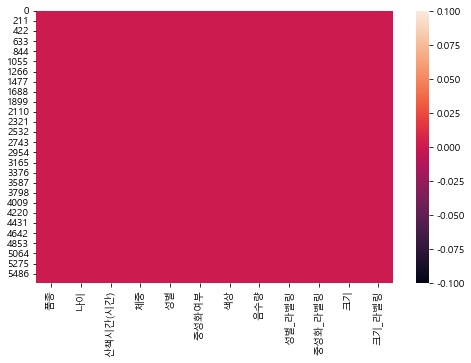

In [9]:
#결측치 시각회
plt.figure(figsize = (8, 5))
sns.heatmap(df.isnull())
plt.show()

# 각 컬럼 별 히스토그램 그려서 데이터 분포 보기 
df.hist(figsize = (12,8))
plt.show()

# 범주형 변수 제외 - 전처리

In [10]:
df.columns

Index(['품종', '나이', '산책시간(시간)', '체중', '성별', '중성화여부', '색상', '음수량', '성별_라벨링',
       '중성화_라벨링', '크기', '크기_라벨링'],
      dtype='object')

In [11]:
#범주형 변수들은 제외하고 새로운 변수로 선언
C1 = df[['나이','산책시간(시간)', '체중', '성별_라벨링',
       '중성화_라벨링','크기_라벨링', '음수량']]

In [12]:
#잘 담겨있는지 확인
C1

,나이,산책시간(시간),체중,성별_라벨링,중성화_라벨링,크기_라벨링,음수량
0,13,0.5,27.0,1,0,2,1755.0
1,10,0.5,25.0,0,0,2,1625.0
2,9,0.5,40.0,1,0,2,2600.0
3,8,0.5,28.0,0,0,2,1820.0
4,8,0.5,33.0,1,0,2,2145.0
...,...,...,...,...,...,...,...
5669,1,0.8,4.0,1,0,0,260.0
5670,0,0.5,3.5,1,0,0,227.5
5671,0,0.5,5.2,1,0,0,338.0
5672,13,0.5,7.3,0,1,0,474.5


# Feature Selection

## 상관분석

In [13]:
C1.corr()

,나이,산책시간(시간),체중,성별_라벨링,중성화_라벨링,크기_라벨링,음수량
나이,1.000000,-0.056727,0.283098,0.097001,0.366550,0.202140,0.283098
산책시간(시간),-0.056727,1.000000,0.537268,0.047376,-0.064798,0.477659,0.537268
체중,0.283098,0.537268,1.000000,0.127471,0.012856,0.916428,1.000000
성별_라벨링,0.097001,0.047376,0.127471,1.000000,0.183315,0.110984,0.127471
중성화_라벨링,0.366550,-0.064798,0.012856,0.183315,1.000000,-0.034216,0.012856
크기_라벨링,0.202140,0.477659,0.916428,0.110984,-0.034216,1.000000,0.916428
음수량,0.283098,0.537268,1.000000,0.127471,0.012856,0.916428,1.000000


<AxesSubplot:>

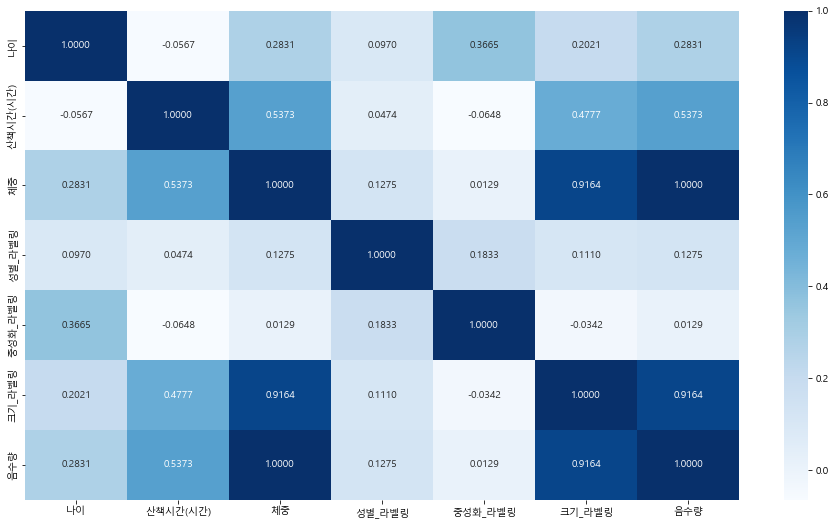

In [14]:
plt.figure(figsize = (16,9))

sns.heatmap(data = C1.corr(),
           cmap = 'Blues', 
           annot = True, fmt = '0.4f')

In [15]:
corr_bar = []

for column in C1.columns:
    print(f"{column}과 크기의 상관관계:{C1[column].corr(C1['크기_라벨링'])}")
    corr_bar.append(C1[column].corr(C1['크기_라벨링']))

나이과 크기의 상관관계:0.2021404585500324
산책시간(시간)과 크기의 상관관계:0.47765942510271586
체중과 크기의 상관관계:0.9164284511703006
성별_라벨링과 크기의 상관관계:0.1109842052361599
중성화_라벨링과 크기의 상관관계:-0.03421605948347803
크기_라벨링과 크기의 상관관계:1.0
음수량과 크기의 상관관계:0.9164284511703032


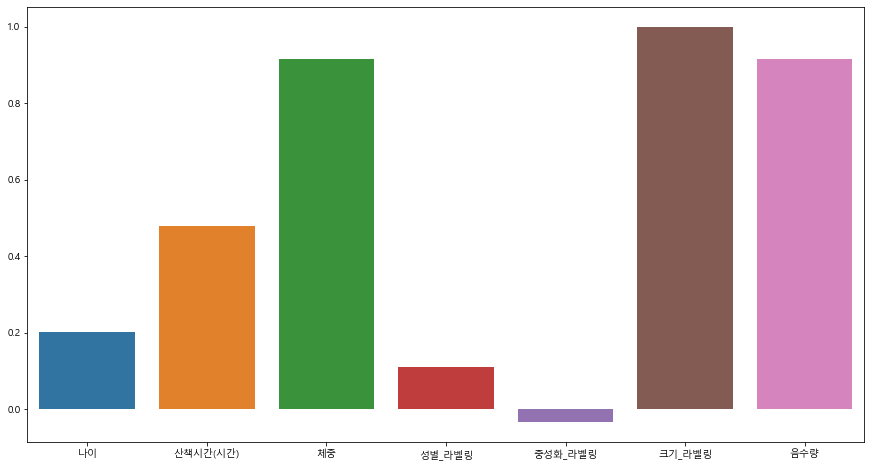

In [16]:
plt.figure(figsize = (15,8))
sns.barplot(C1.columns, corr_bar)
plt.show()

# ElbowPoint

In [17]:
# 군집화 라이브러리 불러오기 .
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [18]:
data = C1

In [19]:
x = [] #k가 몇개인지 -
y = [] #응집도가 몇인지 

# 범위가 1~30인 이유
for k in range (1,30): 
    kmeans = KMeans(n_clusters = k) # 1~ 29개의 군집화 된 객체를 kmeans라고 함   
    kmeans.fit(data)               # kmeans에다가 data2를 학습시킬것임 
    
    x.append(k)
    y.append(kmeans.inertia_)

    
#k가 n개 일 때 응집도는 a라고 이해하면 된다 

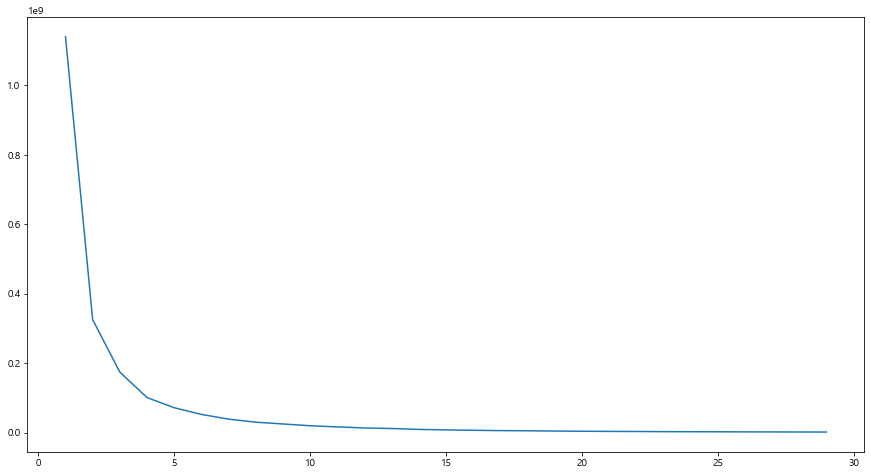

In [20]:
# 그래프 그리기
plt.figure(figsize = (15,8))
plt.plot(x, y)
plt.show()

# 군집화(k = 4) with pca

In [21]:
#정규화 진행 및 객체 생성
scaler = StandardScaler()

In [22]:
#데이터 학습 
scaler.fit(data)

StandardScaler()

In [23]:
scaler_data = scaler.transform(data)

In [24]:
#객체생성 (2개의 객체 만들것임)
pca = PCA(n_components = 2)

In [25]:
pca.fit(scaler_data)

PCA(n_components=2)

In [26]:
pca.transform(scaler_data)

array([[ 4.39382677,  2.8909703 ],
       [ 3.67475571,  1.49538505],
       [ 6.15164396,  1.89144286],
       ...,
       [-1.54345116,  0.29271046],
       [-0.47274751,  4.90169183],
       [ 1.86602492, -0.23976452]])

In [27]:
#2개의 피쳐로 학습된 데이터를 데이터프레임 형태로 변환해주자 
data = pd.DataFrame(data = pca.transform(scaler_data), columns = ['pc1', 'pc2'])
data.head()

,pc1,pc2
0,4.393827,2.890970
1,3.674756,1.495385
2,6.151644,1.891443
3,4.008568,1.018277
4,4.994746,1.707910


In [28]:
# 4개로 군집화 된 객체를 생성 
kmeans = KMeans(n_clusters = 4)

In [29]:
# 군집화 할 데이터 'data'를 학습시키기 
kmeans.fit(data)

KMeans(n_clusters=4)

In [30]:
# 학습된 kmeans의 응집도 확인 (각 데이터로부터 자신이 속한 군집의 중심까지의 거리)
# 응집도가 낮을수록 군집화가 더 잘되어있는 것이다

In [31]:
# 학습된 데이터를  labels 라는 컬럼에 넣어주자 
data['labels'] = kmeans.predict(data)

In [32]:
#각 군집 별 중앙 값 
print(kmeans.cluster_centers_[0])
print(kmeans.cluster_centers_[1])
print(kmeans.cluster_centers_[2])
print(kmeans.cluster_centers_[3])

[-1.03723615 -0.37676573]
[ 1.72768786 -0.26126972]
[-0.32131805  3.08085234]
[ 4.68657849 -0.31110814]


In [33]:
data.head()

,pc1,pc2,labels
0,4.393827,2.890970,3
1,3.674756,1.495385,3
2,6.151644,1.891443,3
3,4.008568,1.018277,3
4,4.994746,1.707910,3


In [34]:
# 위의 값들을 시각화 할거고 그래서 pca를 만든것 

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

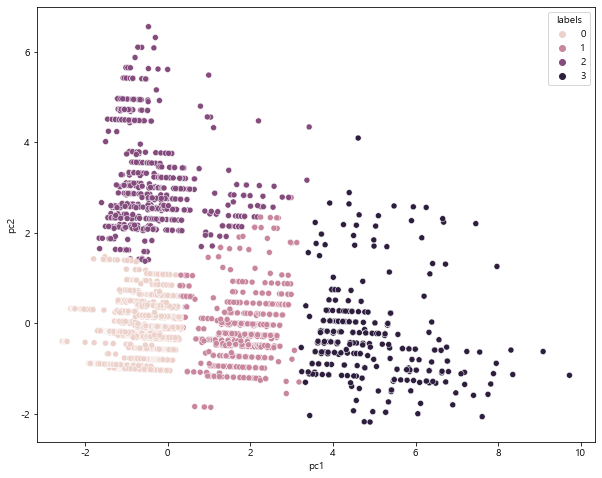

In [35]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'pc1', y = 'pc2', hue = 'labels', data = data)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

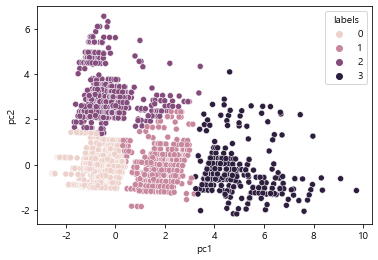

In [36]:
sns.scatterplot(x = 'pc1', y = 'pc2', hue = 'labels', data = data)

# 결과해석 & 시각화
## (1) 앞에 빼놨던 컬럼 붙이기

In [37]:
data

,pc1,pc2,labels
0,4.393827,2.890970,3
1,3.674756,1.495385,3
2,6.151644,1.891443,3
3,4.008568,1.018277,3
4,4.994746,1.707910,3
...,...,...,...
5669,-1.022791,0.040083,0
5670,-1.808212,0.303715,0
5671,-1.543451,0.292710,0
5672,-0.472748,4.901692,2


In [38]:
df

,품종,나이,산책시간(시간),체중,성별,중성화여부,색상,음수량,성별_라벨링,중성화_라벨링,크기,크기_라벨링
0,골든 리트리버,13,0.5,27.0,M,N,갈색,1755.0,1,0,대,2
1,골든 리트리버,10,0.5,25.0,F,N,갈색,1625.0,0,0,대,2
2,골든 리트리버,9,0.5,40.0,M,N,갈색,2600.0,1,0,대,2
3,골든 리트리버,8,0.5,28.0,F,N,갈색,1820.0,0,0,대,2
4,골든 리트리버,8,0.5,33.0,M,N,갈색,2145.0,1,0,대,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5669,프렌치불독,1,0.8,4.0,M,N,흑,260.0,1,0,소,0
5670,프렌치불독,0,0.5,3.5,M,N,검정,227.5,1,0,소,0
5671,프렌치불독,0,0.5,5.2,M,N,"백색, 갈색, 흑색",338.0,1,0,소,0
5672,화이트테리어,13,0.5,7.3,F,Y,흰,474.5,0,1,소,0


In [39]:
df['labels'] = data['labels']

In [40]:
df.head()

,품종,나이,산책시간(시간),체중,성별,중성화여부,색상,음수량,성별_라벨링,중성화_라벨링,크기,크기_라벨링,labels
0,골든 리트리버,13,0.5,27.0,M,N,갈색,1755.0,1,0,대,2,3
1,골든 리트리버,10,0.5,25.0,F,N,갈색,1625.0,0,0,대,2,3
2,골든 리트리버,9,0.5,40.0,M,N,갈색,2600.0,1,0,대,2,3
3,골든 리트리버,8,0.5,28.0,F,N,갈색,1820.0,0,0,대,2,3
4,골든 리트리버,8,0.5,33.0,M,N,갈색,2145.0,1,0,대,2,3


## (2) 그룹별 갯수 시각화

In [41]:
(df['labels'].value_counts(normalize = True)*100).round(1)

0    62.8
1    19.7
2    10.1
3     7.3
Name: labels, dtype: float64

<AxesSubplot:>

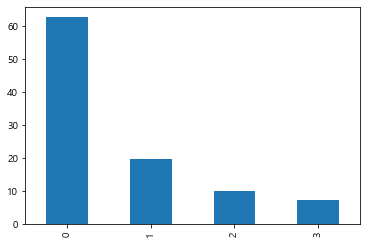

In [42]:
(df['labels'].value_counts(normalize = True)*100).round(1).plot.bar()

## (3) 그룹별 평균 크기 비교

In [43]:
# 시각화를 위해서 각 그룹별 size을 따로 변수로 생성
size0 = df[df['labels'] == 0]['크기_라벨링'].mean()
size1 = df[df['labels'] == 1]['크기_라벨링'].mean()
size2 = df[df['labels'] == 2]['크기_라벨링'].mean()
size3 = df[df['labels'] == 3]['크기_라벨링'].mean()

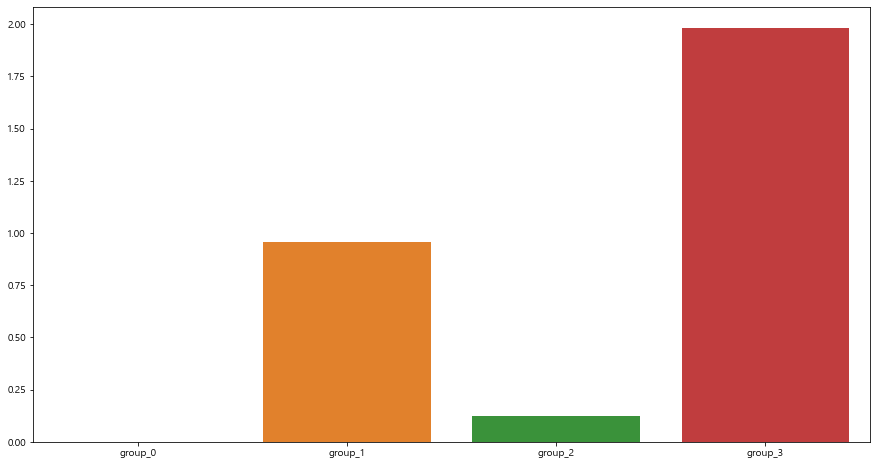

In [44]:
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 랜덤임
plt.figure(figsize = (15,8))
sns.barplot(x = ['group_0', 'group_1', 'group_2', 'group_3'], y = [size0, size1, size2, size3] )
plt.show()

## (4) 그룹별 평균 나이 비교

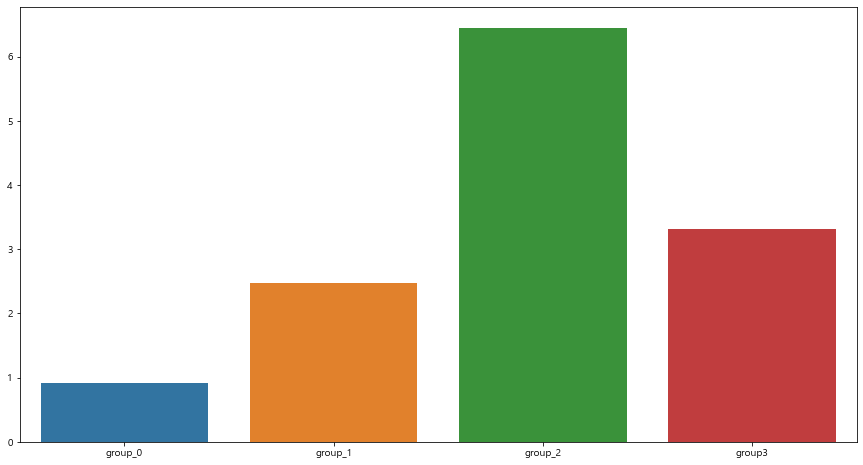

In [45]:
# 시각화를 위해서 각 그룹별 size을 따로 변수로 생성
age0 = df[df['labels'] == 0]['나이'].mean()
age1 = df[df['labels'] == 1]['나이'].mean()
age2 = df[df['labels'] == 2]['나이'].mean()
age3 = df[df['labels'] == 3]['나이'].mean()
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 랜덤임
plt.figure(figsize = (15,8))
sns.barplot(x = ['group_0', 'group_1', 'group_2','group3'], y = [age0, age1, age2,age3] )
plt.show()

## (5) 그룹별 평균 체중비교

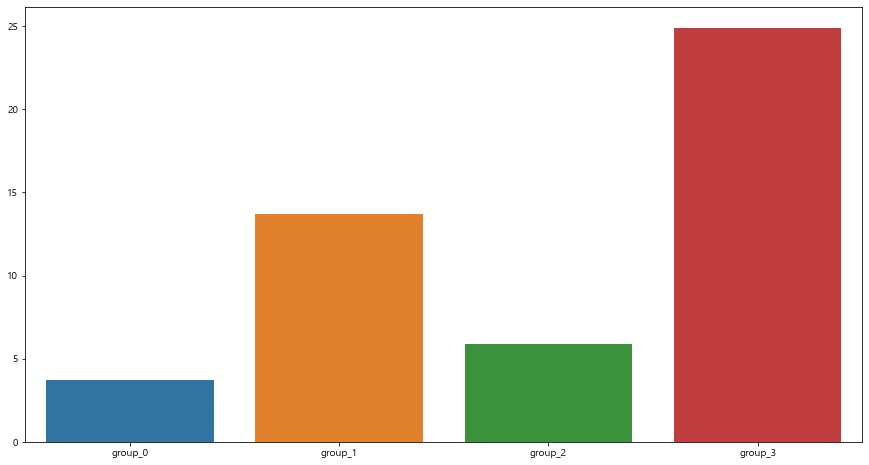

In [46]:
# 시각화를 위해서 각 그룹별 size을 따로 변수로 생성
wgt0 = df[df['labels'] == 0]['체중'].mean()
wgt1 = df[df['labels'] == 1]['체중'].mean()
wgt2 = df[df['labels'] == 2]['체중'].mean()
wgt3 = df[df['labels'] == 3]['체중'].mean()
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 랜덤임
plt.figure(figsize = (15,8))
sns.barplot(x = ['group_0', 'group_1', 'group_2','group_3'], y = [wgt0, wgt1, wgt2, wgt3] )
plt.show()

## (6) 그룹별 평균 권장 산책시간 비교

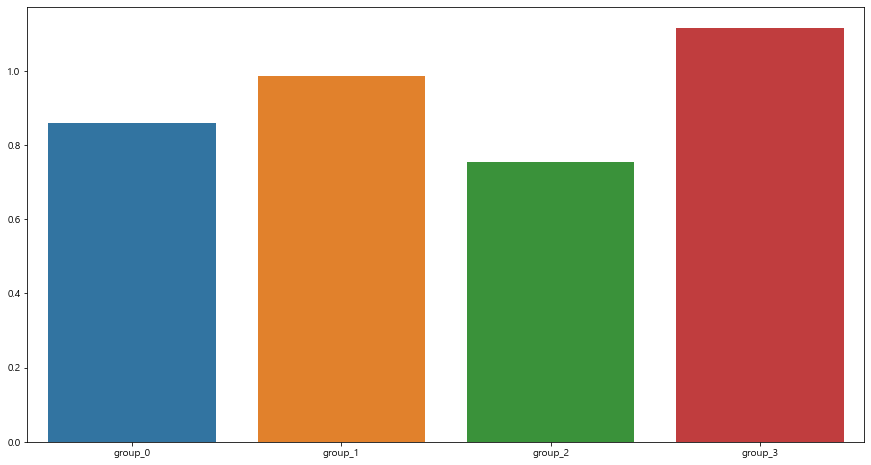

In [47]:
# 시각화를 위해서 각 그룹별 size을 따로 변수로 생성
recom0 = df[df['labels'] == 0]['산책시간(시간)'].mean()
recom1 = df[df['labels'] == 1]['산책시간(시간)'].mean()
recom2 = df[df['labels'] == 2]['산책시간(시간)'].mean()
recom3 = df[df['labels'] == 3]['산책시간(시간)'].mean()
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 랜덤임
plt.figure(figsize = (15,8))
sns.barplot(x = ['group_0', 'group_1', 'group_2','group_3'], y = [recom0, recom1, recom2,recom3] )
plt.show()

## (7)그룹별 특징
- 나이를 기준으로 비교

In [48]:
df.head()

,품종,나이,산책시간(시간),체중,성별,중성화여부,색상,음수량,성별_라벨링,중성화_라벨링,크기,크기_라벨링,labels
0,골든 리트리버,13,0.5,27.0,M,N,갈색,1755.0,1,0,대,2,3
1,골든 리트리버,10,0.5,25.0,F,N,갈색,1625.0,0,0,대,2,3
2,골든 리트리버,9,0.5,40.0,M,N,갈색,2600.0,1,0,대,2,3
3,골든 리트리버,8,0.5,28.0,F,N,갈색,1820.0,0,0,대,2,3
4,골든 리트리버,8,0.5,33.0,M,N,갈색,2145.0,1,0,대,2,3


In [49]:
group = df[(df['labels']==0) | (df['labels']==1) | (df['labels']==2) | (df['labels']==3)]

In [50]:
group['labels'].value_counts()

0    3565
1    1120
2     573
3     416
Name: labels, dtype: int64

In [51]:
group = group.groupby('labels').mean().reset_index()
group

,labels,나이,산책시간(시간),체중,음수량,성별_라벨링,중성화_라벨링,크기_라벨링
0,0,0.912482,0.859439,3.686895,239.648163,0.579523,0.000561,0.000000
1,1,2.470536,0.985804,13.713179,891.356607,0.704464,0.023214,0.956250
2,2,6.452007,0.753403,5.897208,383.318499,0.877836,0.773124,0.122164
3,3,3.319712,1.116346,24.906250,1618.906250,0.790865,0.064904,1.983173


In [52]:
column = group.columns
column

Index(['labels', '나이', '산책시간(시간)', '체중', '음수량', '성별_라벨링', '중성화_라벨링', '크기_라벨링'], dtype='object')

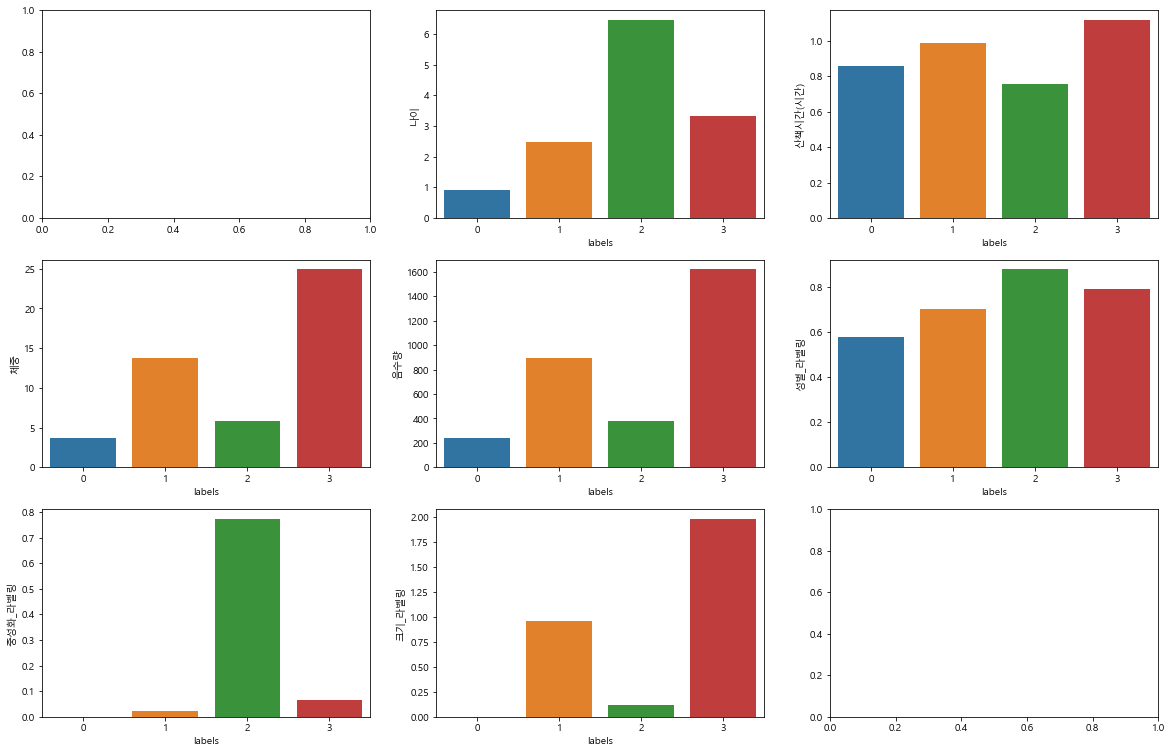

In [53]:
# 반복문으로 그림그리기
f, ax = plt.subplots(3,3,figsize=(20,13))

for i in range(1,8):
        sns.barplot(x='labels', y=column[i], data=group, ax = ax[i//3, i%3])

# sns.barplot(x='labels', y='크기', data = group, ax = ax[0,0])
# sns.barplot(x='labels', y='나이', data = group, ax = ax[0,1])
# sns.barplot(x='labels', y='체중', data = group, ax = ax[1,0])

plt.show()

In [54]:
df[df['labels']==0].describe()

,나이,산책시간(시간),체중,음수량,성별_라벨링,중성화_라벨링,크기_라벨링,labels
count,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.0,3565.0
mean,0.912482,0.859439,3.686895,239.648163,0.579523,0.000561,0.0,0.0
std,1.592341,0.102897,2.240599,145.638919,0.493705,0.023682,0.0,0.0
min,0.000000,0.500000,0.040000,2.600000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.800000,2.000000,130.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.800000,3.000000,195.000000,1.000000,0.000000,0.0,0.0
75%,1.000000,1.000000,5.000000,325.000000,1.000000,0.000000,0.0,0.0
max,8.000000,1.000000,9.800000,637.000000,1.000000,1.000000,0.0,0.0


In [55]:
df[df['labels']==1].describe()

,나이,산책시간(시간),체중,음수량,성별_라벨링,중성화_라벨링,크기_라벨링,labels
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.00000,1120.0
mean,2.470536,0.985804,13.713179,891.356607,0.704464,0.023214,0.95625,1.0
std,1.714426,0.105710,2.992118,194.487677,0.456487,0.150651,0.22541,0.0
min,0.000000,0.500000,5.000000,325.000000,0.000000,0.000000,0.00000,1.0
25%,1.000000,1.000000,11.000000,715.000000,0.000000,0.000000,1.00000,1.0
50%,2.000000,1.000000,14.000000,910.000000,1.000000,0.000000,1.00000,1.0
75%,3.000000,1.000000,16.000000,1040.000000,1.000000,0.000000,1.00000,1.0
max,10.000000,1.500000,25.000000,1625.000000,1.000000,1.000000,2.00000,1.0


In [56]:
df[df['labels']==2].describe()

,나이,산책시간(시간),체중,음수량,성별_라벨링,중성화_라벨링,크기_라벨링,labels
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.0
mean,6.452007,0.753403,5.897208,383.318499,0.877836,0.773124,0.122164,2.0
std,3.813834,0.228884,3.324697,216.105283,0.327761,0.419178,0.338261,0.0
min,0.000000,0.500000,1.200000,78.000000,0.000000,0.000000,0.000000,2.0
25%,3.000000,0.500000,3.600000,234.000000,1.000000,1.000000,0.000000,2.0
50%,6.000000,0.800000,5.000000,325.000000,1.000000,1.000000,0.000000,2.0
75%,10.000000,1.000000,7.300000,474.500000,1.000000,1.000000,0.000000,2.0
max,18.000000,1.500000,22.000000,1430.000000,1.000000,1.000000,2.000000,2.0


In [57]:
df[df['labels']==3].describe()

,나이,산책시간(시간),체중,음수량,성별_라벨링,중성화_라벨링,크기_라벨링,labels
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.0
mean,3.319712,1.116346,24.906250,1618.906250,0.790865,0.064904,1.983173,3.0
std,1.748306,0.246366,5.572075,362.184866,0.407180,0.246653,0.128777,0.0
min,0.000000,0.500000,16.000000,1040.000000,0.000000,0.000000,1.000000,3.0
25%,2.000000,1.000000,20.000000,1300.000000,1.000000,0.000000,2.000000,3.0
50%,3.000000,1.000000,23.000000,1495.000000,1.000000,0.000000,2.000000,3.0
75%,4.000000,1.500000,27.000000,1755.000000,1.000000,0.000000,2.000000,3.0
max,13.000000,1.500000,60.000000,3900.000000,1.000000,1.000000,2.000000,3.0


In [58]:
df.head()

,품종,나이,산책시간(시간),체중,성별,중성화여부,색상,음수량,성별_라벨링,중성화_라벨링,크기,크기_라벨링,labels
0,골든 리트리버,13,0.5,27.0,M,N,갈색,1755.0,1,0,대,2,3
1,골든 리트리버,10,0.5,25.0,F,N,갈색,1625.0,0,0,대,2,3
2,골든 리트리버,9,0.5,40.0,M,N,갈색,2600.0,1,0,대,2,3
3,골든 리트리버,8,0.5,28.0,F,N,갈색,1820.0,0,0,대,2,3
4,골든 리트리버,8,0.5,33.0,M,N,갈색,2145.0,1,0,대,2,3


<AxesSubplot:>

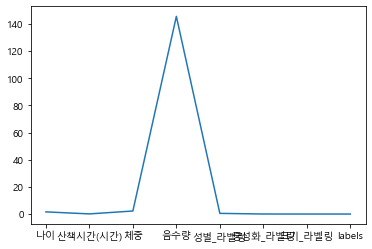

In [59]:
df[df['labels']==0].std().plot()

In [60]:
df.describe()

,나이,산책시간(시간),체중,음수량,성별_라벨링,중성화_라벨링,크기_라벨링,labels
count,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000
mean,1.955939,0.892510,7.444949,483.921678,0.649806,0.087769,0.346493,0.619316
std,2.603371,0.163133,6.894764,448.159680,0.477073,0.282983,0.610848,0.936906
min,0.000000,0.500000,0.040000,2.600000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.800000,2.655000,172.575000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.800000,5.000000,325.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,10.000000,650.000000,1.000000,0.000000,1.000000,1.000000
max,18.000000,1.500000,60.000000,3900.000000,1.000000,1.000000,2.000000,3.000000


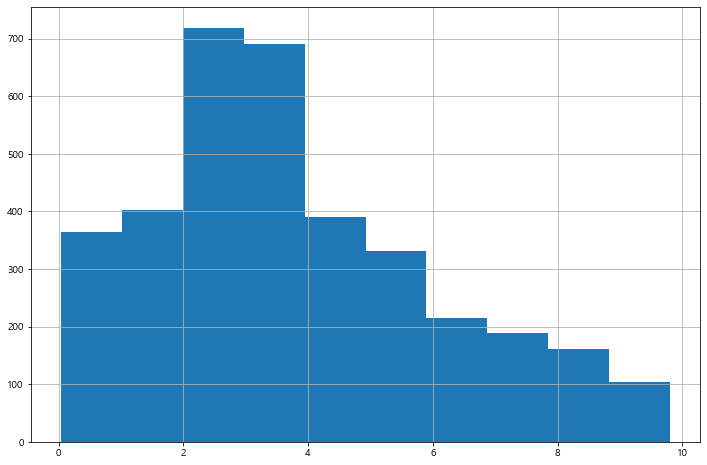

In [61]:
plt.figure(figsize=(12,8))
df[df['labels']==0]['체중'].hist()
plt.show()

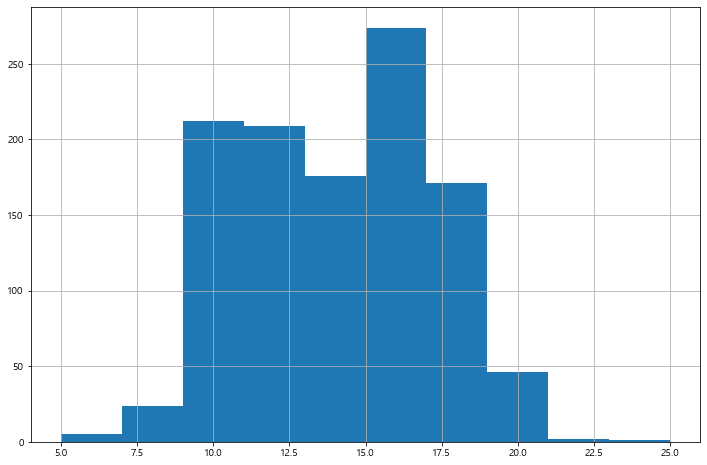

In [62]:
plt.figure(figsize=(12,8))
df[df['labels']==1]['체중'].hist()
plt.show()

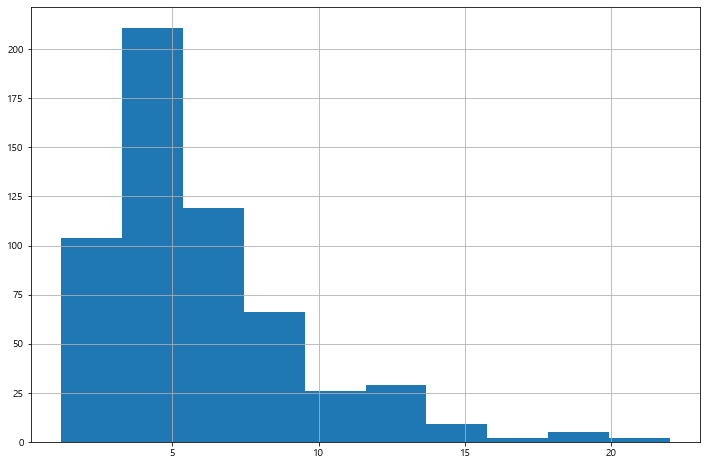

In [63]:
plt.figure(figsize=(12,8))
df[df['labels']==2]['체중'].hist()
plt.show()


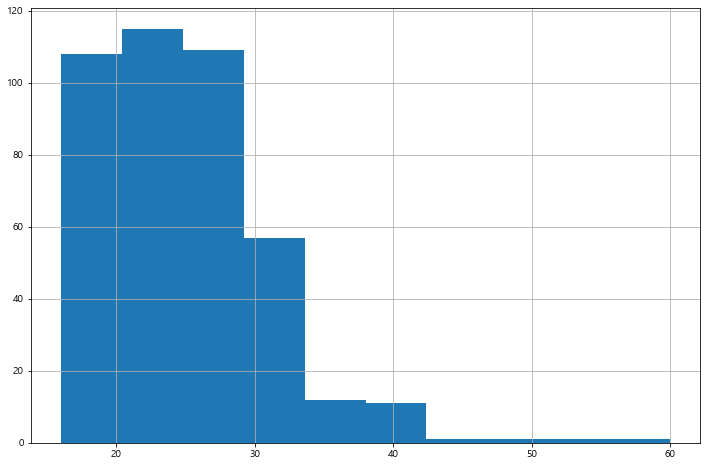

In [64]:
plt.figure(figsize=(12,8))
df[df['labels']==3]['체중'].hist()
plt.show()